# UTSA CS 3793: Assignment-3

**Last Name - First Name - (abc123)**






## Learning Objectives

Implement 2 different machine learning algorithms
*   Stochastic Gradient Descent
*   ID3 Decision Tree



## Description

This assignment is focused on **machine learning**, mainly on the implementation of 2 different algorithms - Stochastic Gradient Descent & ID3 decision tree.
The assignment is divided into two sections, each for one unique ML algorithm.

The base structure and comments are provided on what should be done. You can use some libraries that help support you for the successful completion of the assignment. However, you **CANNOT** use a complete library that contains the implementation of ML algorithms. You can get pieces of code from online, but please cite the source properly.


##Import Libraries

Write all the import statements here. This should be for both algorithm implmentations. As mentioned before, you can not use any premade ML libraries.

In [ ]:
# import all required libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Assume that the data files are in the following folder -- THIS WILL BE USED BY THE TA
basePath = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/"


#Stochastic Gradient Descent

In this section, you will implement the Stochastic Gradient Descent algorithm. The training is for a **binary classification** task i.e. each instance will have a class value of 0 or 1. Also, assume that you are given **all binary-valued attributes** and that there are **no missing values** in the train or test data.


##Algorithm

(40 points)

Following are the data files that will be provided to you for the gradient descent algorithm implementation.

*   Training file - 'gd-train.dat'
*   Testing file - 'gd-test.dat'

In these files, only non-space characters are relevant. The first line contains the attribute names. All the other lines are different example instances to be used for the algorithm. Each column holds values of the attributes, whereas the last column holds the class label for that instance.

Write the code in the following code block, structure is provided. Instructions on the steps to follow are provided as comments.



In [ ]:
# Data file name variables
train = basePath + "gd-train.dat"
test = basePath + "gd-test.dat"


In [ ]:
# Read the training and testing data files
#df_train = pd.read_csv(train, delimiter='\t')
#df_test = pd.read_csv(test, delimiter='\t')
train_data = pd.read_table(train)
test_data = pd.read_table(test)
#print(df_train.head())
print(train_data.head())
#shape = df_train.shape
#print(shape)
#x = train_data.values
#y = x.shape
#print(y)
x_list = train_data.iloc[:, :-1]
x = x_list.iloc[1]
print(len(x_list))

   A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  A11  A12  A13  C
0   1   1   1   1   0   0   1   1   0    0    0    1    1  0
1   0   0   0   1   0   0   1   1   0    1    0    0    1  0
2   0   1   1   1   0   1   1   1   1    0    0    0    1  0
3   0   1   1   0   1   0   1   1   1    0    1    0    1  0
4   0   1   0   0   0   1   0   1   0    1    0    0    1  0
100


In [ ]:
# Activation Function - implement Sigmoid
def activation_function(h):
  z = 1 / (1 + math.exp(-h))
  return z
    # given 'h' compute and return 'z' based on the activation function implemented

h = 2
z = activation_function(h)
print(z)

0.8807970779778823


In [ ]:
# Train the model using the given training dataset and the learning rate
# return the "weights" learnt for the perceptron - include the weight assocaited with bias as the last entry
def train(train_data, learning_rate=0.05):
   x_list = train_data.iloc[:, :-1]
   y_list = train_data.iloc[:, -1]
   weights = np.zeros_like(x_list.iloc[0], dtype=float)

   for i in range(len(x_list)):
     x = x_list.iloc[i].array
     h = np.dot(weights, x)
     z = activation_function(h)

     for j in range(len(weights)):
       weights[j] = weights[j] + learning_rate * (y_list[i] - z) * x[j]

   return weights

    # initialize weights to 0
    # go through each training data instance
        # get 'x' as one multi-variate data instance and 'y' as the ground truth class label
        # obtain h(x)
        # call the activation function with 'h' as parameter to obtain 'z'
        # update all weights individually using learning_rate, (y-z), and the corresponding 'x'
    # return the final learnt weights
#weights = np.zeros((100, 14))
#print(weights)
vv = train(train_data, learning_rate=0.05)
print(vv)

[-0.22852855 -0.16735817 -0.23906308 -0.1632718  -0.06399205 -0.13642841
 -0.45715898 -0.0647466   0.14529141  0.14062673 -0.03449521 -0.33360645
 -0.19902365]


In [ ]:
# Test the model (weights learnt) using the given test dataset
# return the accuracy value
def test(test_data, weights, threshold):
  positive = 0
  negative = 0
  x_list = test_data.iloc[:, :-1]
  y_list = test_data.iloc[:, -1]

  for i in range(len(x_list)):
    x = x_list.iloc[i].array
    h = np.dot(weights, x)
    z = activation_function(h)
    if (z >= threshold):
      z = 1
    else:
      z = 0
    if (z == y_list[i]):
      positive += 1
    else:
      negative += 1
  test_instances = len(x_list)
  acc = (positive / test_instances) * 100
  return acc

    # go through each testing data instance
        # get 'x' as one multi-variate data instance and 'y' as the ground truth class label
        # obtain h(x)
        # call the activation function with 'h' as parameter to obtain 'z'
        # use 'threshold' to convert 'z' to either 0 or 1 so as to match to the ground truth binary labels
        # compare the thresholded 'z' with 'y' to calculate the positive and negative instances for calculating accuracy
    # return the accuracy value for the given test dataset


In [ ]:
# Gradient Descent function
def gradient_descent(df_train, df_test, learning_rate=0.05, threshold=0.5):
  weights = train(df_train, learning_rate=0.05)
  train_acc = test(df_train, weights, threshold)
  test_acc = test(df_test, weights, threshold)
  return (train_acc, test_acc)
    # call the train function to train the model and obtain the weights
    # call the test function with the training dataset to obtain the training accuracy
    # call the test function with the testing dataset to obtain the testing accuracy
    # return (trainAccuracy, testAccuracy)


In [ ]:
# Threshold of 0.5 will be used to classify the instance for the test. If the value is >= 0.5, classify as 1 or else 0.
threshold = 0.5


In [ ]:
learning_rates = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
accuracy = []
for num in learning_rates:
  x = gradient_descent(train_data, test_data, num, threshold)
  temp = [num, x[0], x[1]]
  accuracy.append(temp)
  print(f"accuracy for LR of {num} on Training Set = {x[0]} % ")
  print(f"accuracy for LR of {num} on Testing Set = {x[1]} % ")

#print(accuracy)
# Main algorithm loop
# Loop through all the different learning rates [0.05, 1]
    # For each learning rate selected, call the gradient descent function to obtain the train and test accuracy values
    # Print both the accuracy values as "Accuracy for LR of 0.1 on Training set = x %" OR "Accuracy for LR of 0.1 on Testing set = x %"


accuracy for LR of 0.05 on Training Set = 68.0 % 
accuracy for LR of 0.05 on Testing Set = 72.25 % 
accuracy for LR of 0.1 on Training Set = 68.0 % 
accuracy for LR of 0.1 on Testing Set = 72.25 % 
accuracy for LR of 0.15 on Training Set = 68.0 % 
accuracy for LR of 0.15 on Testing Set = 72.25 % 
accuracy for LR of 0.2 on Training Set = 68.0 % 
accuracy for LR of 0.2 on Testing Set = 72.25 % 
accuracy for LR of 0.25 on Training Set = 68.0 % 
accuracy for LR of 0.25 on Testing Set = 72.25 % 
accuracy for LR of 0.3 on Training Set = 68.0 % 
accuracy for LR of 0.3 on Testing Set = 72.25 % 
accuracy for LR of 0.35 on Training Set = 68.0 % 
accuracy for LR of 0.35 on Testing Set = 72.25 % 
accuracy for LR of 0.4 on Training Set = 68.0 % 
accuracy for LR of 0.4 on Testing Set = 72.25 % 
accuracy for LR of 0.45 on Training Set = 68.0 % 
accuracy for LR of 0.45 on Testing Set = 72.25 % 
accuracy for LR of 0.5 on Training Set = 68.0 % 
accuracy for LR of 0.5 on Testing Set = 72.25 % 
accuracy f

##Extra Credit - Accuracy Plots

(05 points)

Use the above accuracy results on the training and testing data and write code to plot the graphs as mentioned in the code block below.



[0.7225, 0.7225, 0.7225, 0.7225, 0.7225, 0.7225, 0.7225, 0.7225, 0.7225, 0.7225, 0.7225, 0.7225, 0.7225, 0.7225, 0.7225, 0.7225, 0.7225, 0.7225, 0.7225, 0.7225]


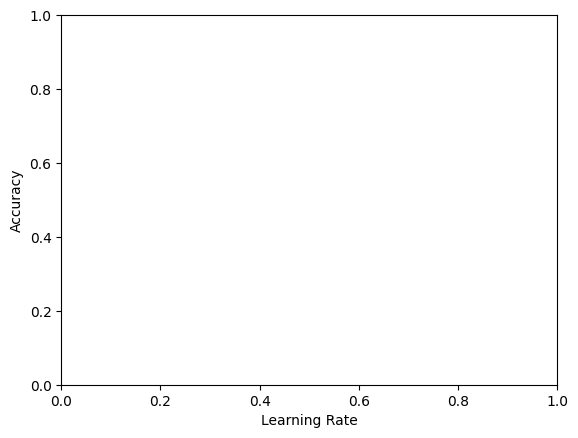

In [ ]:
# Plot the graphs for accuracy results.
# There will be 2 graphs - one for training data and the other for testing data
# For each graph,
    # X-axis will be the learning rate going from 0.05-1 in increments on 0.05
    # Y-axis will be the accuracy values at the selected learning rate.
rates = []
test = []
train = []

for i, j, k in accuracy:
  rates.append(i)
  train.append(j/100)
  test.append(k/100)
print(test)
plt.plot(test, train)
plt.axis([0, 1, 0, 1])
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.show()

#ID3 Decision Tree

In this section, you will implement the ID3 Decision Tree algorithm. The training is for a **binary classification** task i.e. each instance will have a class value of 0 or 1. Also, assume that there are **no missing values** in the train or test data.


## Algorithm

(85 points)

Following are the data files that will be provided to you for the ID3 algorithm implementation.

*   Training file - 'id3-train.dat'
*   Testing file - 'id3-test.dat'

In these files, only non-space characters are relevant. The first line contains the attribute names. All the other lines are example instances to be used for the algorithm. Each column holds values of the attributes, whereas the last column holds the class label for that instance.

In a decision tree, if you reach a leaf node but still have examples that belong to different classes, then choose the most frequent class (among the instances at the leaf node). If you reach a leaf node in the decision tree and have no examples left or the examples are equally split among multiple classes, then choose the class that is most frequent in the entire training set. You do not need to implement pruning. Also, don’t forget to use logarithm base 2 when computing entropy and set (0 log 0) to 0.

Write the code in the following code block, structure is provided. Instructions on the steps to follow are provided as comments. The code should output the following 3 things:

*   Print the Decision Tree created, in the following example format:

    ```
    attr1 = 0 :
        attr2 = 0 :
            attr3 = 0 : 1 -- 4
            attr3 = 1 : 0 -- 9
        attr2 = 1 :
            attr4 = 0 : 0 -- 2
            attr4 = 1 : 1 -- 10
    attr1 = 1 :
        attr2 = 1 : 1 -- 17

    ```

*   Accuracy on the Training data = x %
*   Accuracy on the Test data = x %





In [ ]:
# Data file name variables
train = basePath + "id3-train.dat"
test = basePath + "id3-test.dat"


In [ ]:
train_data = pd.read_table(train)
test_data = pd.read_table(test)
print(train_data.head())
print()
print(test_data.head())


   attr1  attr2  attr3  attr4  attr5  attr6  class
0      1      1      0      0      0      0      0
1      0      0      1      1      0      1      0
2      0      1      0      1      1      0      0
3      0      0      1      0      0      1      1
4      0      1      0      0      0      0      0

   attr1  attr2  attr3  attr4  attr5  attr6  class
0      1      1      1      1      0      0      0
1      0      0      0      1      0      0      0
2      0      1      1      1      0      1      1
3      0      1      1      0      1      0      1
4      0      1      0      0      0      1      0


In [ ]:
def ID3(data, root, attr_remaining):

  return 0
# Pseudocode for the ID3 algorithm. Use this to create function(s).
# def ID3(data, root, attributesRemaining):
    # If you reach a leaf node in the decision tree and have no examples left or the examples are equally split among multiple classes
        # Choose and the class that is most frequent in the entire training set and return the updated tree
    # If all the instances have only one class label
        # Make this as the leaf node and use the label as the class value of the node and return the updated tree
    # If you reached a leaf node but still have examples that belong to different classes (there are no remaining attributes to be split)
        # Assign the most frequent class among the instances at the leaf node and return the updated tree
    # Find the best attribute to split by calculating the maximum information gain from the attributes remaining by calculating the entropy
    # Split the tree using the best attribute and recursively call the ID3 function using DFS to fill the sub-tree
    # return the root as the tree



In [ ]:
# Following is the base code structure. Feel free to change the code structure as you see fit, maybe even create more functions.

# Read the first line in the training data file, to get the number of attributes
# Read all the training instances and the ground truth class labels.
# Create the decision tree by implementing the ID3 algorithm. Pseudocode provided above.
# Print the tree in the example format mentioned.
# Use the above created tree to predict the training data and print the accuracy as "Accuracy on the Training data = x %"
    # For each training instance, predict the output label
    # Compare it with the ground truth class label and calculate the accuracy accordingly
# Use the above created tree to predict the testing data and print the accuracy as "Accuracy on the Test data = x %"
    # For each testing instance, predict the output label
    # Compare it with the ground truth class label and calculate the accuracy accordingly

def calc_total_entropy(data):
  total_rows = data.shape[0]
  class_list = data['class'].tolist()
  zero_list = [i for i in class_list if i == 0]
  num_zeros = len(zero_list)
  ones_list = len(class_list) - len(zero_list)

  H = -(num_zeros / total_rows) * np.log2(num_zeros / total_rows) + (-(ones_list / total_rows)) * np.log2(ones_list / total_rows)
  total_entropy = H
  return total_entropy


def calc_entropy(data, class_label):
  total_rows = data.shape[0]
  class_list = data['class'].tolist()
  zero_list = [i for i in class_list if i == 0]
  num_zeros = len(zero_list)
  num_ones = len(class_list) - len(zero_list)

  target_values = data[class_label].unique()
  atrr_entropy = 0
  for value in target_values:
    count = len(data[data[class_label] == value])
    ratio = count / total_rows
    attr_entropy -= ratio * np.log2(ratio) if ratio != 0 else 0

  return attr_entropy

def information_gain(total_entropy, attr_entropy ):
  return  total_entropy - attr_entropy

def make_tree():
  return 0



##Extra Credit - Learning Curve

(05 points)

Instead of taking the entire training data (all 800 instances), loop through to select 'x' instances in the increments of 40 (i.e. 40, 80, 120, and so on). For each selected number 'x', randomly pick the example instances from the training data and call the ID3 function to create the decision tree. Calculate the accuracy of the created ID3 tree on the Test data file. Plot the corresponding graph, aka Learning Curve.


In [ ]:
# Loop through to select the number of instances 'x' in increments of 40
# For each 'x',
    # Randomly select 'x' instances
    # Create the ID3 decision tree using those instances
    # Calculate the accuracy of the ID3 tree created on the Test data

# Plot the learning curve using the accuracy values
    # X-axis will be the number of training instances used for creating the tree
    # Y-axis will be the accuracy in % on the Test data



#Submission Instructions

1.   Complete all tasks above - **File MUST contain the output for ALL cells**
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Upload the .ipynb file on Blackboard

##Rubric

*   (40 points) Gradient Descent Algorithm
*   (05 points) Extra Credit - GD Accuracy Plots
*   (85 points) ID3 Algorithm
*   (05 points) Extra Credit - ID3 Learning Curve
